In [18]:
import numpy as np

import HepRead
import HepTools

import os
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk

In [2]:
model = 'BLSSM'
work_dir = '/scratch/mjad1g20/HEP/WorkArea/BLSSM_Work'
spheno_dir = '/scratch/mjad1g20/HEP/SPHENO/SPheno-3.3.8'
reference_lhs = '/scratch/mjad1g20/HEP/SPHENO/SPheno-3.3.8/BLSSM/Input_Files/LesHouches.in.BLSSM'
madgraph_dir = '/scratch/mjad1g20/HEP/MG5_aMC_v3_1_1'

In [3]:
param_cards_dir = '/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan/SPhenoBLSSM_output'

In [4]:
h1 = np.array([])
h2 = np.array([])
cards = np.array([])
for card in os.listdir(param_cards_dir):
    path = os.path.join(param_cards_dir,card)
    slha = HepRead.Slha(path)
    h1 = np.append(h1,slha.particle(25).mass)
    h2 = np.append(h2,slha.particle(35).mass)
    cards = np.append(cards,card)
    
    

In [29]:
df = pd.DataFrame(dict(mh1 = h1, mh2 = h2, card_number=cards))
df.head()

,mh1,mh2,card_number
0,113.380734,140.912836,SPheno.spc.BLSSM_HEscan_548
1,111.325331,133.653999,SPheno.spc.BLSSM_HEscan_910
2,114.253656,140.524001,SPheno.spc.BLSSM_HEscan_113
3,109.937386,120.749248,SPheno.spc.BLSSM_HEscan_745
4,56.948237,115.606767,SPheno.spc.BLSSM_HEscan_577


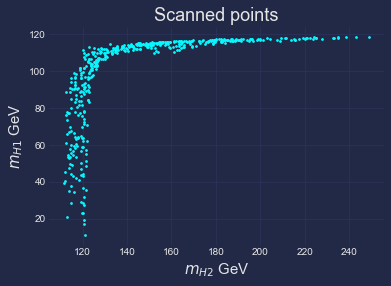

In [26]:
plt.style.use("cyberpunk")

plt.scatter(df.mh2, df.mh1,s=3)
plt.ylabel(r'$m_{H1}$ GeV',fontsize=15)
plt.xlabel(r'$m_{H2}$ GeV',fontsize=15)
plt.title('Scanned points',fontsize=18)
plt.show()

In [36]:
df_select = df[(df.mh2 > 124.) & (df.mh2 < 126)]
df_select.head()

,mh1,mh2,card_number
54,102.930553,125.982397,SPheno.spc.BLSSM_HEscan_980
77,101.838075,124.409141,SPheno.spc.BLSSM_HEscan_636
108,101.369773,125.921333,SPheno.spc.BLSSM_HEscan_253
164,109.452509,124.534898,SPheno.spc.BLSSM_HEscan_735
178,104.208124,124.236234,SPheno.spc.BLSSM_HEscan_761


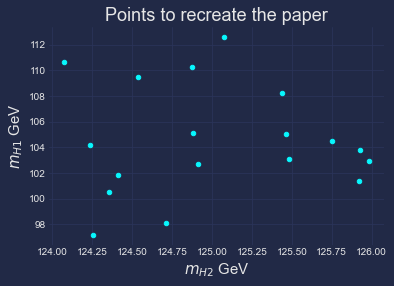

In [37]:
plt.style.use("cyberpunk")

plt.scatter(df_select.mh2, df_select.mh1,s=20)
plt.ylabel(r'$m_{H1}$ GeV',fontsize=15)
plt.xlabel(r'$m_{H2}$ GeV',fontsize=15)
plt.title('Points to recreate the paper',fontsize=18)
plt.show()

In [49]:
df_select[(df_select.mh1 < 100)]

,mh1,mh2,card_number
277,98.110488,124.713216,SPheno.spc.BLSSM_HEscan_1
364,97.188136,124.255537,SPheno.spc.BLSSM_HEscan_818


In [79]:
point = df_select[(df_select.mh1 < 100)].mh2.idxmax()
selected_param_card = df.iloc[277].card_number
print('id : ',point)
print('Param card : {}'.format(selected_param_card))

id :  277
Param card : SPheno.spc.BLSSM_HEscan_1
